---
# Performaing EDA Using Matplotlib Library. For Focus on finding
 - What percentage of Netflix contents are Movies? TV Shows?
 - The amount of Netflix content by country?
 - Who are the most popular actors and directors on Netflix?
 - What kind of content is Netflix focusing on?
 - What are the top genres per country?
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ! unzip '/content/drive/MyDrive/CW_Intern_Task/Task 2/netflix_titles.csv.zip' -d '/content/drive/MyDrive/CW_Intern_Task/Task 2/netflix_titles.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [23]:
plt.xkcd()

In [4]:
Netflix_data = pd.read_csv('/content/drive/MyDrive/CW_Intern_Task/Task 2/netflix_titles.csv/netflix_titles.csv')

In [5]:
Netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


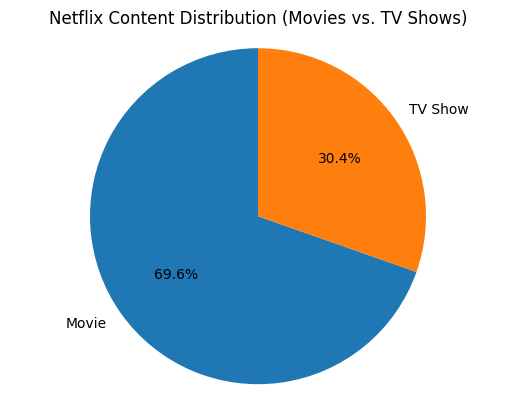

In [6]:
# Plot 1: Percentage of Netflix contents that are Movies vs. TV Shows
content_type_counts = Netflix_data['type'].value_counts()
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Netflix Content Distribution (Movies vs. TV Shows)')
plt.axis('equal')
plt.show()

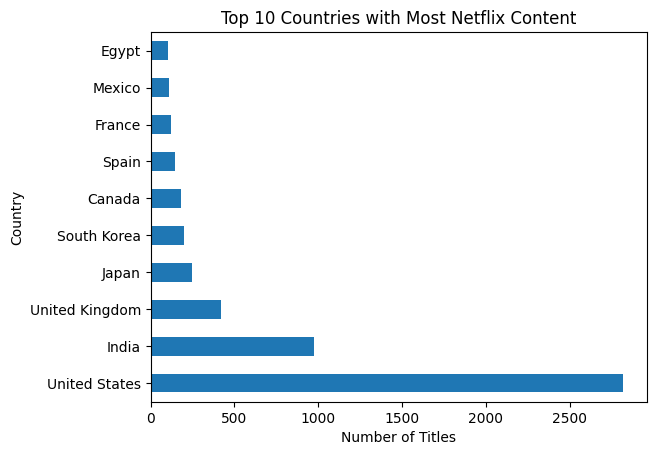

In [7]:
top_countries = Netflix_data['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

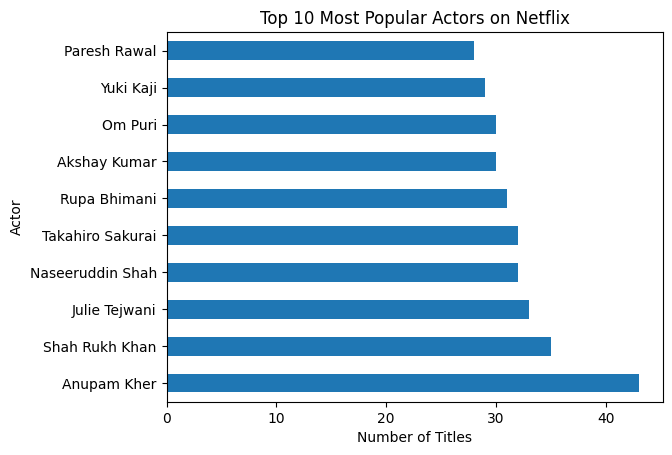

In [8]:
actors = Netflix_data['cast'].str.split(', ', expand=True).stack().value_counts().head(10)
actors.plot(kind='barh')
plt.title('Top 10 Most Popular Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

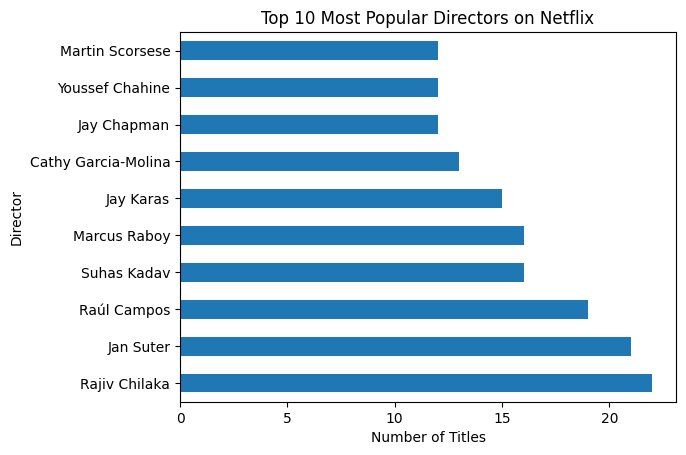

In [9]:
directors = Netflix_data['director'].str.split(', ', expand=True).stack().value_counts().head(10)
directors.plot(kind='barh')
plt.title('Top 10 Most Popular Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

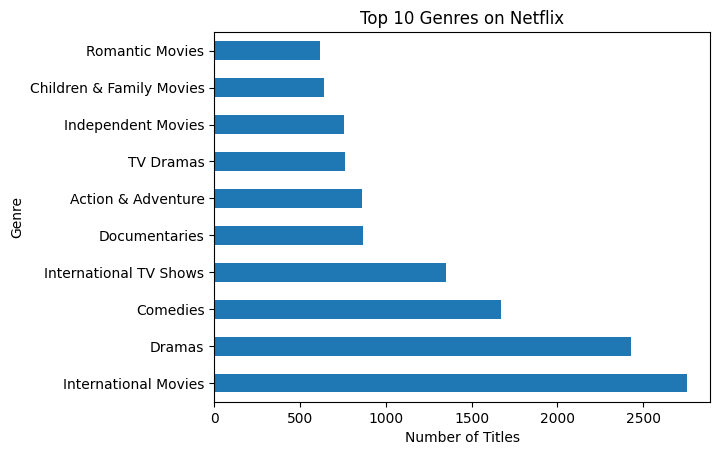

In [10]:
top_genres = Netflix_data['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
top_genres.plot(kind='barh')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

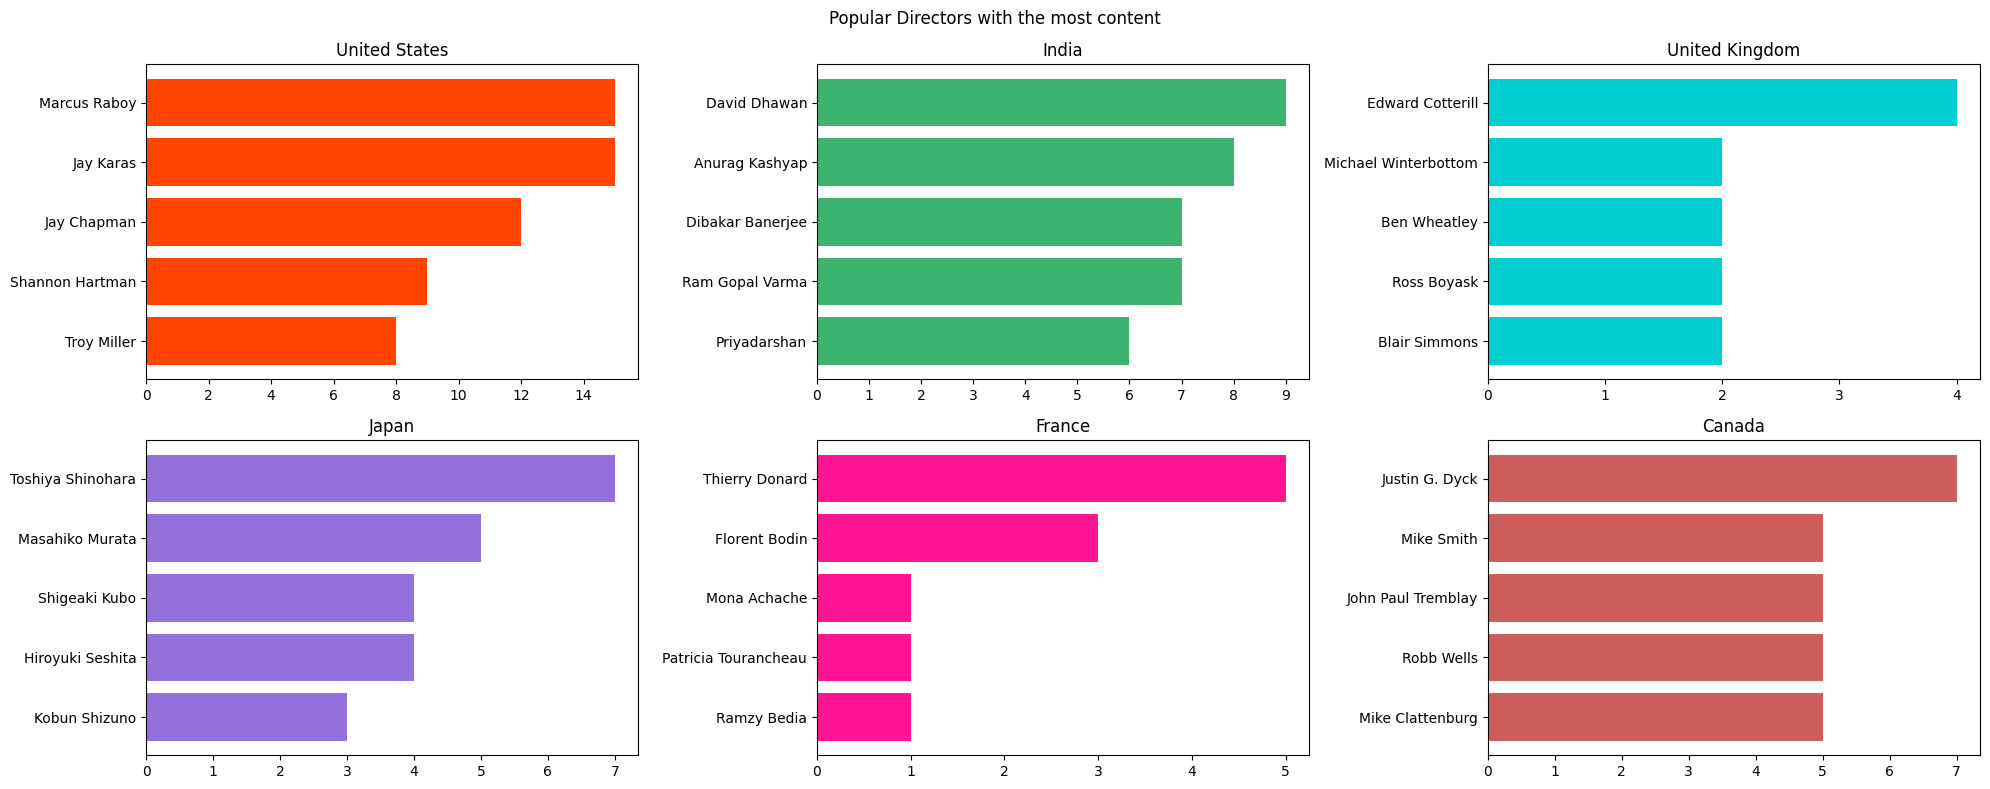

In [11]:
from collections import Counter
from matplotlib.pyplot import figure
import math

# Define colors and countries list
colors = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]
col = "director"  # Assuming you want to analyze directors

# Create a figure
figure(num=None, figsize=(20, 8))

x = 1
for country in countries_list:
    country_df = Netflix_data[Netflix_data["country"] == country]
    categories = ", ".join(country_df[col].fillna("")).split(", ")
    counter_list = Counter(categories).most_common(6)
    counter_list = [_ for _ in counter_list if _[0] != ""]
    labels = [_[0] for _ in counter_list][::-1]
    values = [_[1] for _ in counter_list][::-1]
    if max(values) < 10:
        values_int = range(0, math.ceil(max(values)) + 1)
    else:
        values_int = range(0, math.ceil(max(values)) + 1, 2)
    plt.subplot(2, 3, x)
    plt.barh(labels, values, color=colors[x - 1])
    plt.xticks(values_int)
    plt.title(country)
    x += 1

plt.suptitle('Popular Directors with the most content')
plt.tight_layout()
plt.show()


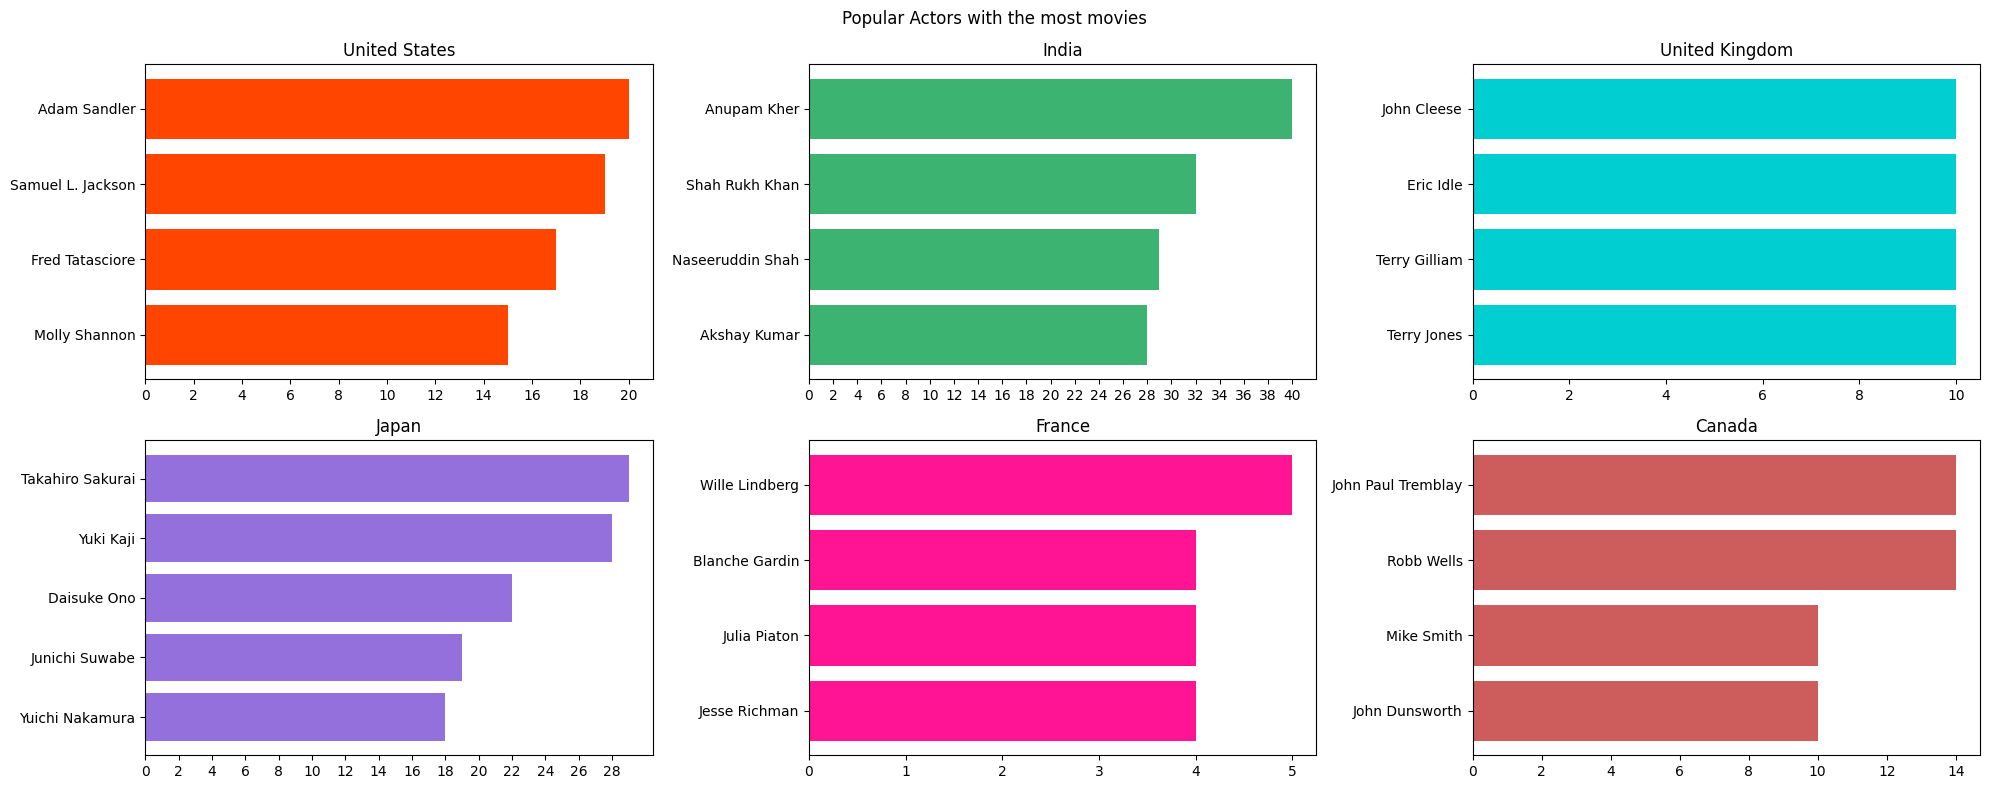

In [12]:
from collections import Counter
from matplotlib.pyplot import figure
import math

# Define colors and countries list
colors = ["orangered", "mediumseagreen", "darkturquoise", "mediumpurple", "deeppink", "indianred"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada"]
col = "cast"

# Create a figure
figure(num=None, figsize=(20, 8))

x = 1
for country in countries_list:
    country_df = Netflix_data[Netflix_data["country"] == country]
    categories = ", ".join(country_df[col].fillna("")).split(", ")
    counter_list = Counter(categories).most_common(5)
    counter_list = [_ for _ in counter_list if _[0] != ""]
    labels = [_[0] for _ in counter_list][::-1]
    values = [_[1] for _ in counter_list][::-1]
    if max(values) < 10:
        values_int = range(0, math.ceil(max(values)) + 1)
    else:
        values_int = range(0, math.ceil(max(values)) + 1, 2)
    plt.subplot(2, 3, x)
    plt.barh(labels, values, color=colors[x - 1])
    plt.xticks(values_int)
    plt.title(country)
    x += 1

plt.suptitle('Popular Actors with the most movies')
plt.tight_layout()
plt.show()


In [15]:
Netflix_data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

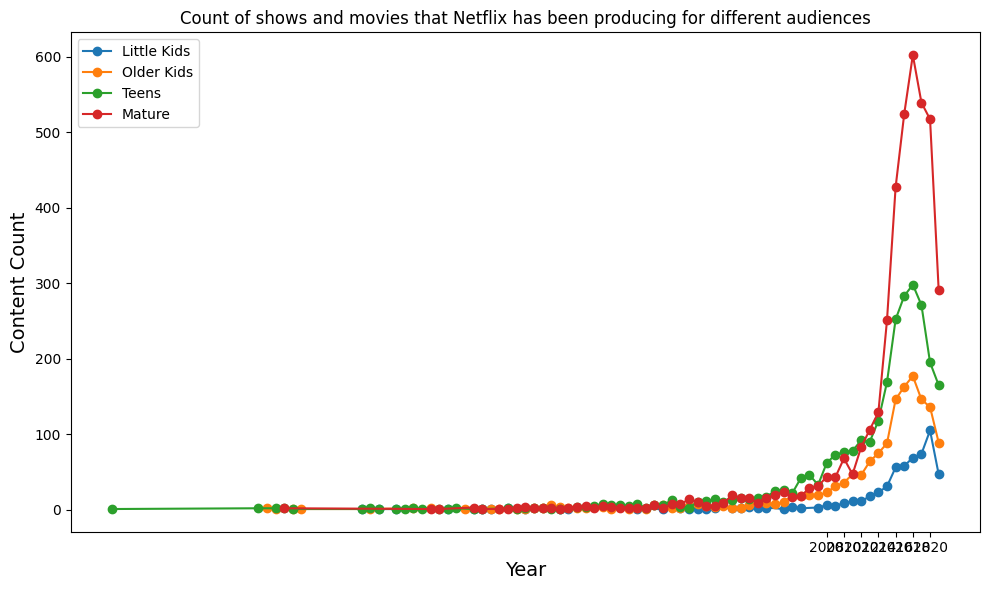

In [20]:
ratings_list = ['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV']
ratings_group_list = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
ratings_dict = {
    'TV-G': 'Little Kids',
    'TV-Y': 'Little Kids',
    'G': 'Little Kids',
    'TV-PG': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'TV-Y7-FV': 'Older Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-MA': 'Mature',
    'R': 'Mature',
    'NC-17': 'Mature'
}

# Map ratings to rating groups
Netflix_data['rating_group'] = Netflix_data['rating'].map(ratings_dict)

Netflix_data['rating_val'] = 1

figure(figsize=(10, 6))

x = 0
for r in ratings_group_list:
    grouped = Netflix_data[Netflix_data['rating_group'] == r]
    year_df = grouped.groupby(['release_year']).sum()
    year_df.reset_index(level=0, inplace=True)
    plt.plot(year_df['release_year'], year_df['rating_val'], marker='o')
    values_int = range(2008, math.ceil(max(year_df['release_year'])) + 1, 2)
    plt.xticks(values_int)
    plt.title('Count of shows and movies that Netflix has been producing for different audiences', fontsize=12)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Content Count', fontsize=14)
    x += 1

plt.legend(ratings_group_list)
plt.tight_layout()
plt.show()


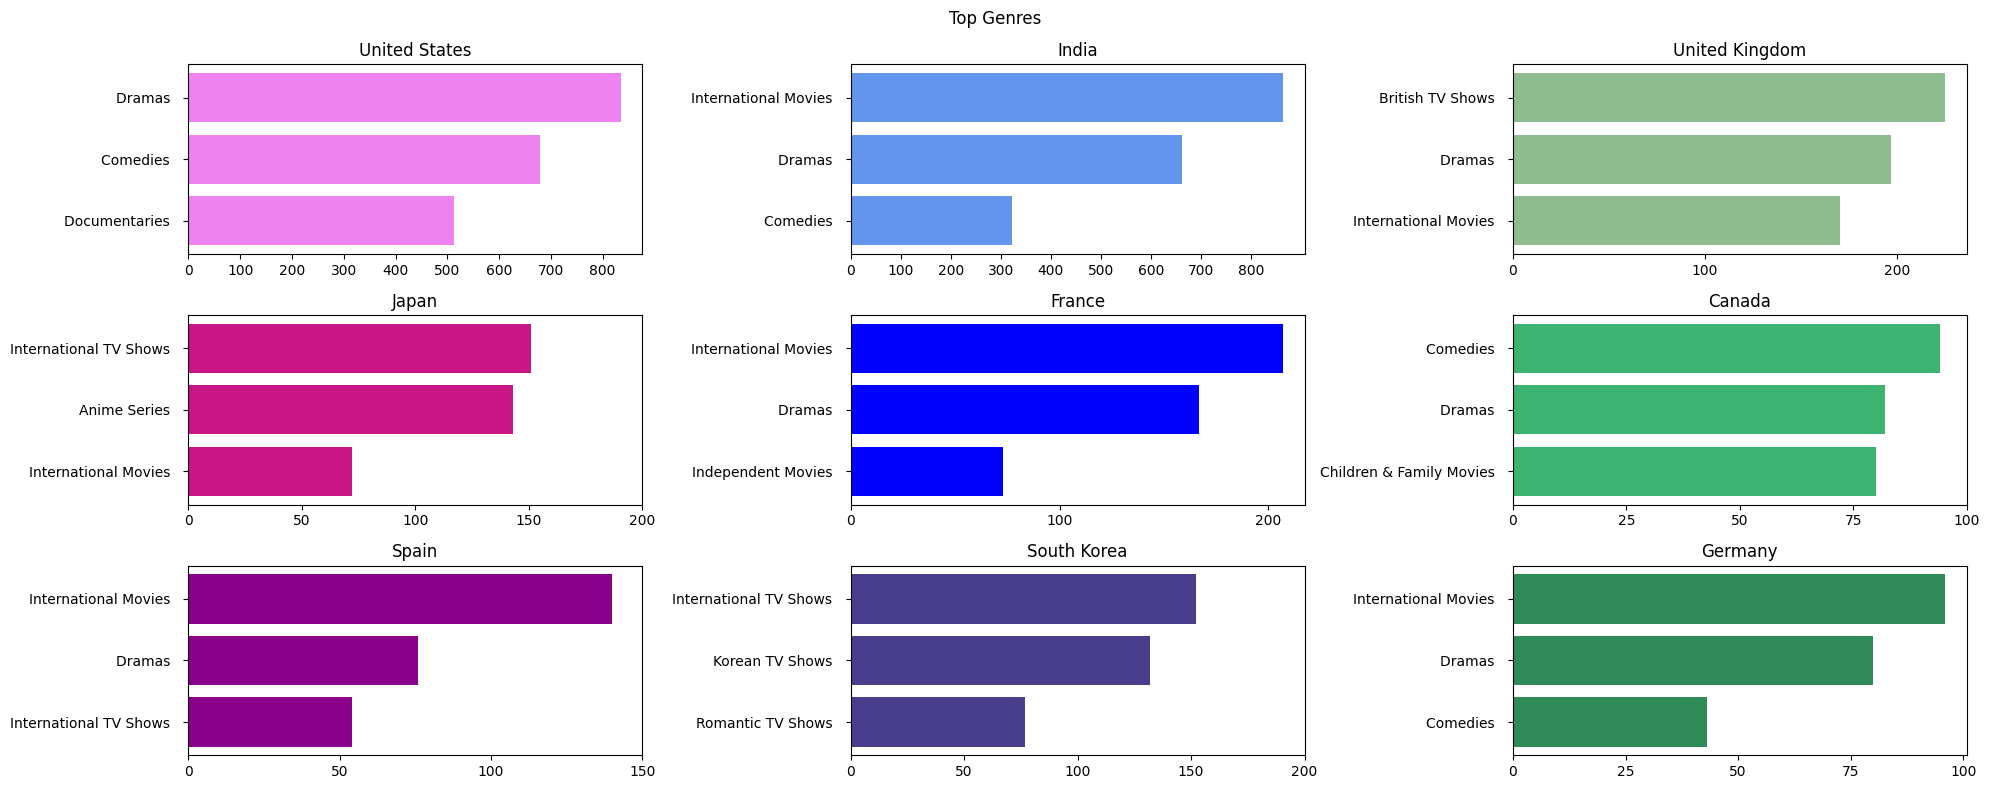

In [21]:
col = "listed_in"
colors = ["violet", "cornflowerblue", "darkseagreen", "mediumvioletred", "blue", "mediumseagreen", "darkmagenta", "darkslateblue", "seagreen"]
countries_list = ["United States", "India", "United Kingdom", "Japan", "France", "Canada", "Spain", "South Korea", "Germany"]

# Create a figure
figure(num=None, figsize=(20, 8))

x = 1
for country in countries_list:
    Netflix_data["from_country"] = Netflix_data['country'].fillna("").apply(lambda x: 1 if country.lower() in x.lower() else 0)
    small = Netflix_data[Netflix_data["from_country"] == 1]
    genre = ", ".join(small['listed_in'].fillna("")).split(", ")
    tags = Counter(genre).most_common(3)
    tags = [_ for _ in tags if "" != _[0]]
    labels, values = [_[0] + "  " for _ in tags][::-1], [_[1] for _ in tags][::-1]
    if max(values) > 200:
        values_int = range(0, math.ceil(max(values)), 100)
    elif max(values) > 100 and max(values) <= 200:
        values_int = range(0, math.ceil(max(values)) + 50, 50)
    else:
        values_int = range(0, math.ceil(max(values)) + 25, 25)
    plt.subplot(3, 3, x)
    plt.barh(labels, values, color=colors[x - 1])
    plt.xticks(values_int)
    plt.title(country)
    x += 1

plt.suptitle('Top Genres')
plt.tight_layout()
plt.show()

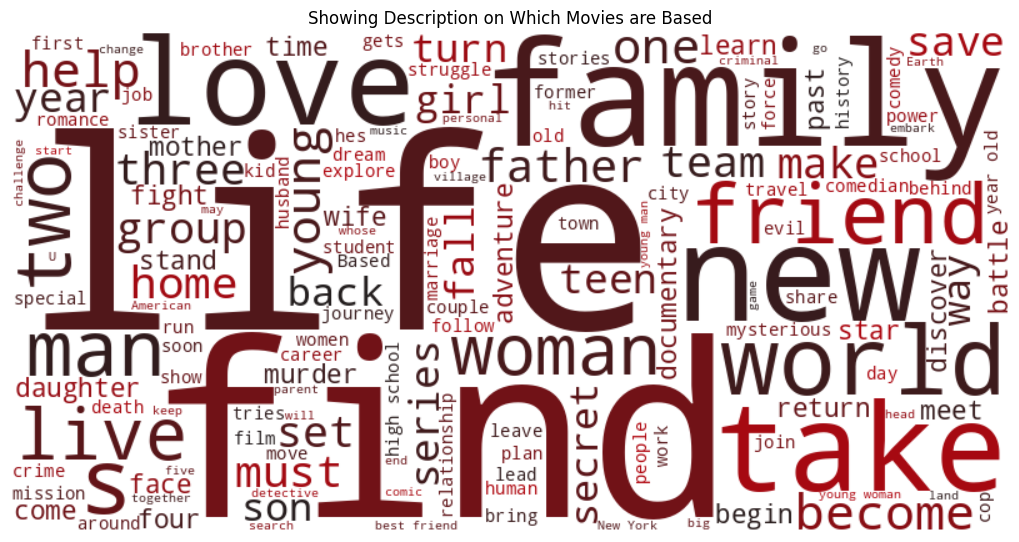

In [22]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Custom colour map based on Netflix palette
cmap = plt.cm.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# Combine descriptions into a single string
text = str(list(Netflix_data['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

# Load custom mask
# mask = np.array(Image.open('/content/download.png'))

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, colormap=cmap, max_words=150).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Showing Description on Which Movies are Based')
plt.tight_layout(pad=0)
plt.show()
